## comparison between biological replicates

- last updated: 6/10/2024
- Author: Yang-Joon Kim

This notebook is for EDA on biological replicates. Some ideas are the following:


- 
- 

In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import os
import sys

In [58]:
mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default

# Editable text and proper LaTeX fonts in illustrator
# matplotlib.rcParams['ps.useafm'] = True
# Editable fonts. 42 is the magic number
mpl.rcParams['pdf.fonttype'] = 42
sns.set(style='whitegrid', context='paper')

# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')

In [35]:
# define the figure path
figpath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/peak_calling_benchmark/"
os.makedirs(figpath, exist_ok=True)

## Part 1. Comparing the peak profiles from different group.by parameters

In [5]:
# import the dataframes of peak profiles (called by different group.by parameters in MACS2/Signac)
df_CRG_peaks = pd.read_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/sequencing_ver1/TDR118_cicero_output/df_CRG_peaks.csv", index_col=0)
print(df_CRG_peaks.head())

df_MACS2_bulk_peaks = pd.read_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/sequencing_ver1/TDR118_cicero_output/df_MACS2_bulk_peaks.csv", index_col=0)
print(df_MACS2_bulk_peaks.head())

df_MACS2_celltype_peaks = pd.read_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/sequencing_ver1/TDR118_cicero_output/df_MACS2_celltype_peaks.csv", index_col=0)
print(df_MACS2_celltype_peaks.head())

   seqnames  start    end  width strand
1         1   2372   3057    686      *
2         1   6507   7253    747      *
3         1  11485  12198    714      *
4         1  14475  15248    774      *
5         1  16516  17393    878      *
  seqnames  start    end  width strand
1        1   3596   4069    474      *
2        1   4478   6981   2504      *
3        1  11049  12897   1849      *
4        1  14695  15041    347      *
5        1  18522  19033    512      *
  seqnames  start    end  width strand
1        1   3543   3972    430      *
2        1   4473   6139   1667      *
3        1  10985  12920   1936      *
4        1  13368  13579    212      *
5        1  14640  15052    413      *


/tmp/ipykernel_1160001/723873278.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_MACS2_bulk_peaks = pd.read_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/sequencing_ver1/TDR118_cicero_output/df_MACS2_bulk_peaks.csv", index_col=0)
/tmp/ipykernel_1160001/723873278.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_MACS2_celltype_peaks = pd.read_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/sequencing_ver1/TDR118_cicero_output/df_MACS2_celltype_peaks.csv", index_col=0)


In [10]:
df_CRG_peaks.head()

,seqnames,start,end,width,strand
1,1,2372,3057,686,*
2,1,6507,7253,747,*
3,1,11485,12198,714,*
4,1,14475,15248,774,*
5,1,16516,17393,878,*


## descriptive analysis on the peak profiles (called by different group.by parameters in Signac::MACS2)

In [25]:
dataframes = [df_CRG_peaks, df_MACS2_bulk_peaks, df_MACS2_celltype_peaks]
data_labels = ["CRG", "MACS2-bulk", "MACS2-celltype"]

In [17]:
np.max(df_CRG_peaks.width)
np.max(df_MACS2_bulk_peaks.width)
np.max(df_MACS2_celltype_peaks.width)

3528

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


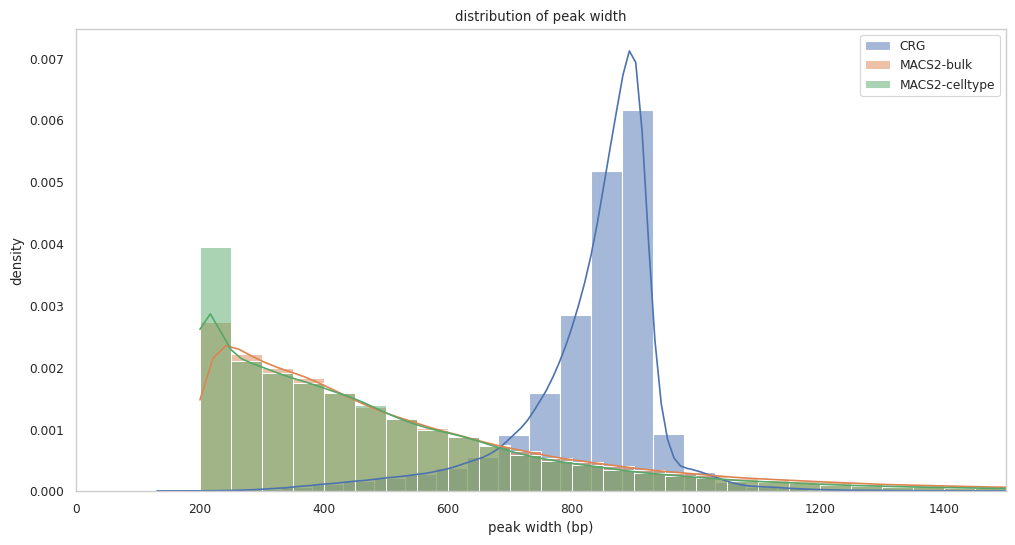

DataFrame 1 Peak Width Statistics:
count    248320.000000
mean        833.239373
std         114.210004
min         131.000000
25%         796.000000
50%         862.000000
75%         899.000000
max        2179.000000
Name: width, dtype: float64

DataFrame 2 Peak Width Statistics:
count    435704.000000
mean        533.802416
std         327.387103
min         200.000000
25%         300.000000
50%         437.000000
75%         662.000000
max        4360.000000
Name: width, dtype: float64

DataFrame 3 Peak Width Statistics:
count    316680.000000
mean        487.657553
std         290.647238
min         200.000000
25%         274.000000
50%         409.000000
75%         610.000000
max        3528.000000
Name: width, dtype: float64



In [62]:
# Plot histograms of peak widths
data_id = "TDR118"

# Define the bin edges
bin_edges = np.arange(0, 1500 + 100, 50)

plt.figure(figsize=(12, 6))
for i, df in enumerate(dataframes):
    sns.histplot(df['width'], kde=True, stat="density", label=data_labels[i], 
                 binwidth=50, alpha=0.5) #  bins=bin_edges,
plt.xlabel('peak width (bp)')
plt.ylabel('density')
plt.xlim([0, 1500])
plt.title('distribution of peak width')
plt.legend()
plt.grid(False)

plt.savefig(figpath + f"hist_peak_widths_{data_id}.pdf")
plt.savefig(figpath + f"hist_peak_widths_{data_id}.png")

plt.show()

# Calculate basic statistics for peak widths
for i, df in enumerate(dataframes, 1):
    print(f'DataFrame {i} Peak Width Statistics:')
    print(df['width'].describe())
    print()

In [ ]:
# Count the total number of peaks in each dataframe
for i, df in enumerate(dataframes, 1):
    print(f'DataFrame {i} Number of Peaks: {len(df)}')

In [46]:
df_CRG_peaks

,seqnames,start,end,width,strand
1,1,2372,3057,686,*
2,1,6507,7253,747,*
3,1,11485,12198,714,*
4,1,14475,15248,774,*
5,1,16516,17393,878,*
...,...,...,...,...,...
248316,9,56433462,56434391,930,*
248317,9,56437053,56437849,797,*
248318,9,56450898,56451686,789,*
248319,9,56452315,56452858,544,*


In [47]:
# define a function to rename the columns for the dataframe for pyranges(gRanges objects exported from R)
def rename_cols_pyranges(df):
    # Rename columns using a dictionary
    df = df.rename(columns={
        'seqnames': 'Chromosome',
        'start': 'Start',
        'end': 'End',
        'width': 'Width',
        'strand': 'Strand'
    })
    return df


In [48]:
df_CRG_peaks = rename_cols_pyranges(df_CRG_peaks)
df_CRG_peaks.head()

,Chromosome,Start,End,Width,Strand
1,1,2372,3057,686,*
2,1,6507,7253,747,*
3,1,11485,12198,714,*
4,1,14475,15248,774,*
5,1,16516,17393,878,*


In [49]:
df_MACS2_bulk_peaks = rename_cols_pyranges(df_MACS2_bulk_peaks)
df_MACS2_celltype_peaks = rename_cols_pyranges(df_MACS2_celltype_peaks)


In [50]:
import pyranges as pr

gr1 = pr.PyRanges(df_CRG_peaks)
gr1

,Chromosome,Start,End,Width,Strand
0,1,2372,3057,686,NaN
1,1,6507,7253,747,NaN
2,1,11485,12198,714,NaN
3,1,14475,15248,774,NaN
4,1,16516,17393,878,NaN
...,...,...,...,...,...
248315,25,37484660,37485493,834,NaN
248316,25,37489624,37490462,839,NaN
248317,25,37492451,37493228,778,NaN
248318,25,37496561,37497001,441,NaN


In [51]:
# # Convert dataframes to PyRanges objects
# gr1 = pr.PyRanges(df_CRG_peaks)
# gr2 = pr.PyRanges(df_MACS2_bulk_peaks)
# gr3 = pr.PyRanges(df_MACS2_celltype_peaks)

# # Function to find overlaps
# def find_overlaps(gr1, gr2):
#     return gr1.join(gr2, how="overlap")

# # Find overlaps between the PyRanges objects
# overlap_12 = find_overlaps(gr1, gr2)
# overlap_13 = find_overlaps(gr1, gr3)
# overlap_23 = find_overlaps(gr2, gr3)
# overlap_123 = find_overlaps(overlap_12, gr3)

# # Count the number of overlapping peaks
# count_1 = len(gr1) - len(overlap_12) - len(overlap_13) + len(overlap_123)
# count_2 = len(gr2) - len(overlap_12) - len(overlap_23) + len(overlap_123)
# count_3 = len(gr3) - len(overlap_13) - len(overlap_23) + len(overlap_123)
# count_12 = len(overlap_12) - len(overlap_123)
# count_13 = len(overlap_13) - len(overlap_123)
# count_23 = len(overlap_23) - len(overlap_123)
# count_123 = len(overlap_123)

# # Plot Venn diagram
# from matplotlib_venn import venn3

# venn3(subsets=(count_1, count_2, count_12, count_3, count_13, count_23, count_123),
#       set_labels=('DataFrame 1', 'DataFrame 2', 'DataFrame 3'))
# plt.title('Overlapping Peaks')
# plt.show()

AssertionError: 

In [55]:
gr_bulk

,Chromosome,Start,End,Width,Strand
0,1,3596,4069,474,NaN
1,1,4478,6981,2504,NaN
2,1,11049,12897,1849,NaN
3,1,14695,15041,347,NaN
4,1,18522,19033,512,NaN
...,...,...,...,...,...
435699,25,37499291,37500085,795,NaN
435700,25,37500623,37500823,201,NaN
435701,25,37501104,37501926,823,NaN
435702,MT,29,3505,3477,NaN


In [54]:
non_overlapping_bulk

,Chromosome,Start,End,Width,Strand
0,1,3972,4069,474,NaN
1,1,6139,6981,2504,NaN
2,1,22275,22524,250,NaN
3,1,28707,28996,290,NaN
4,1,32406,32684,279,NaN
...,...,...,...,...,...
485898,25,37500623,37500823,201,NaN
485899,25,37501104,37501445,823,NaN
485900,25,37501804,37501926,823,NaN
485901,MT,13232,13333,3314,NaN


In [52]:
# Convert dataframes to PyRanges objects
gr_celltype = pr.PyRanges(df_MACS2_celltype_peaks)
gr_bulk = pr.PyRanges(df_MACS2_bulk_peaks)
gr_crg = pr.PyRanges(df_CRG_peaks)

# Start with celltype-specific peaks
master_peaks = gr_celltype

# Add non-overlapping peaks from bulk
non_overlapping_bulk = gr_bulk.subtract(master_peaks)
master_peaks = master_peaks.union(non_overlapping_bulk)

# Add non-overlapping peaks from CRG
non_overlapping_crg = gr_crg.subtract(master_peaks)
master_peaks = master_peaks.union(non_overlapping_crg)

# Visualize the iterative merging process
# Initial celltype peaks
plt.figure(figsize=(8, 4))
venn2([set(gr_celltype.as_df().apply(tuple, 1)), set(gr_bulk.as_df().apply(tuple, 1))],
      set_labels=('Celltype Peaks', 'Bulk Peaks'))
plt.title('Step 1: Celltype Peaks and Bulk Peaks')
plt.show()

# After adding non-overlapping peaks from bulk
plt.figure(figsize=(8, 4))
venn2([set(master_peaks.as_df().apply(tuple, 1)), set(gr_crg.as_df().apply(tuple, 1))],
      set_labels=('Master Peaks (Celltype + Bulk)', 'CRG Peaks'))
plt.title('Step 2: Master Peaks and CRG Peaks')
plt.show()

# Final master peaks
plt.figure(figsize=(8, 4))
venn3([set(gr_celltype.as_df().apply(tuple, 1)),
       set(gr_bulk.as_df().apply(tuple, 1)),
       set(gr_crg.as_df().apply(tuple, 1))],
      set_labels=('Celltype Peaks', 'Bulk Peaks', 'CRG Peaks'))
plt.title('Step 3: Final Master Peaks')
plt.show()

AttributeError: ('PyRanges object has no attribute', 'union')

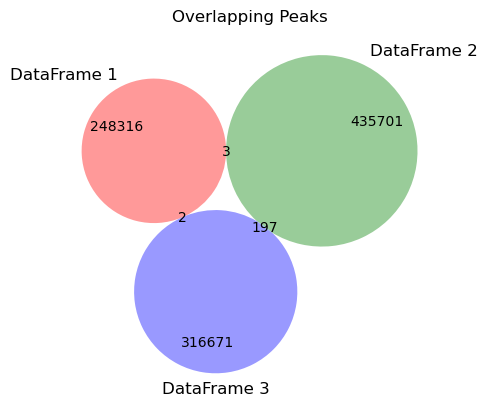

In [41]:
from intervaltree import Interval, IntervalTree
from matplotlib_venn import venn3

def get_intervals(df):
    return IntervalTree(Interval(row.start, row.end) for idx, row in df.iterrows())

intervals1 = get_intervals(df_CRG_peaks)
intervals2 = get_intervals(df_MACS2_bulk_peaks)
intervals3 = get_intervals(df_MACS2_celltype_peaks)

overlap_12 = intervals1 & intervals2
overlap_13 = intervals1 & intervals3
overlap_23 = intervals2 & intervals3
overlap_123 = overlap_12 & intervals3

venn3(subsets=(len(intervals1), len(intervals2), len(overlap_12),
               len(intervals3), len(overlap_13), len(overlap_23),
               len(overlap_123)),
      set_labels=('DataFrame 1', 'DataFrame 2', 'DataFrame 3'))
plt.title('Overlapping Peaks')
plt.show()